In [3]:
from __future__ import division,print_function,unicode_literals

import numpy as np 
import os 

def reset_graph():
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [7]:
y_pred

array([1])

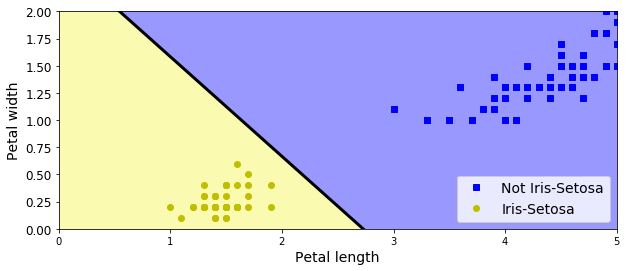

In [11]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]


axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

In [12]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def relu(z):
    return np.maximum(0,z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

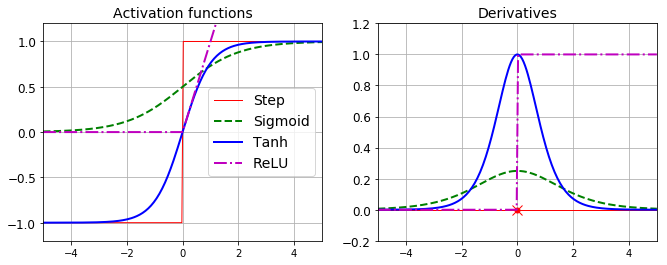

In [14]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [15]:
def heavside(z):
    return (z>=0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heavside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 -0.5) -0.5)

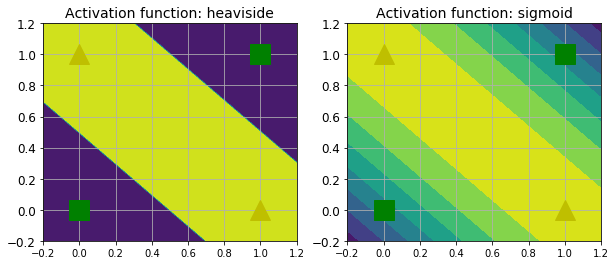

In [17]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heavside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [18]:
import tensorflow as tf

In [20]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28 * 28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28 * 28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [21]:
feature_cols = [tf.feature_column.numeric_column("X",shape=[28*28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300, 100], n_classes=10,
                                    feature_columns=feature_cols)
input_fn = tf.estimator.inputs.numpy_input_fn(
x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_master': '', '_train_distribute': None, '_keep_checkpoint_max': 5, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001F128A26F60>, '_save_checkpoints_secs': 600, '_is_chief': True, '_service': None, '_model_dir': 'C:\\Users\\B_Majda\\AppData\\Local\\Temp\\tmp1k23owdy', '_num_worker_replicas': 1, '_task_type': 'worker', '_device_fn': None, '_save_checkpoints_steps': None, '_session_config': None, '_evaluation_master': '', '_num_ps_replicas': 0, '_tf_random_seed': None, '_log_step_count_steps': 100, '_task_id': 0, '_global_id_in_cluster': 0}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 i

INFO:tensorflow:global_step/sec: 355.775
INFO:tensorflow:loss = 1.1298379, step = 7201 (0.281 sec)
INFO:tensorflow:global_step/sec: 405.104
INFO:tensorflow:loss = 0.33866748, step = 7301 (0.247 sec)
INFO:tensorflow:global_step/sec: 342.561
INFO:tensorflow:loss = 0.56317115, step = 7401 (0.291 sec)
INFO:tensorflow:global_step/sec: 429.286
INFO:tensorflow:loss = 0.0103458995, step = 7501 (0.233 sec)
INFO:tensorflow:global_step/sec: 350.872
INFO:tensorflow:loss = 0.8079367, step = 7601 (0.285 sec)
INFO:tensorflow:global_step/sec: 354.611
INFO:tensorflow:loss = 0.8236424, step = 7701 (0.282 sec)
INFO:tensorflow:global_step/sec: 387.593
INFO:tensorflow:loss = 1.6782783, step = 7801 (0.258 sec)
INFO:tensorflow:global_step/sec: 327.862
INFO:tensorflow:loss = 0.15536594, step = 7901 (0.304 sec)
INFO:tensorflow:global_step/sec: 359.021
INFO:tensorflow:loss = 0.3409751, step = 8001 (0.278 sec)
INFO:tensorflow:global_step/sec: 353.893
INFO:tensorflow:loss = 0.29159322, step = 8101 (0.283 sec)
INF

INFO:tensorflow:global_step/sec: 403.784
INFO:tensorflow:loss = 0.046449132, step = 15401 (0.250 sec)
INFO:tensorflow:global_step/sec: 231.466
INFO:tensorflow:loss = 0.07170718, step = 15501 (0.434 sec)
INFO:tensorflow:global_step/sec: 312.496
INFO:tensorflow:loss = 0.054103557, step = 15601 (0.318 sec)
INFO:tensorflow:global_step/sec: 308.641
INFO:tensorflow:loss = 0.04126865, step = 15701 (0.323 sec)
INFO:tensorflow:global_step/sec: 369.074
INFO:tensorflow:loss = 0.1796229, step = 15801 (0.270 sec)
INFO:tensorflow:global_step/sec: 446.394
INFO:tensorflow:loss = 0.18815322, step = 15901 (0.224 sec)
INFO:tensorflow:global_step/sec: 321.562
INFO:tensorflow:loss = 0.07374886, step = 16001 (0.310 sec)
INFO:tensorflow:global_step/sec: 431.012
INFO:tensorflow:loss = 0.20852353, step = 16101 (0.233 sec)
INFO:tensorflow:global_step/sec: 425.6
INFO:tensorflow:loss = 0.060636215, step = 16201 (0.235 sec)
INFO:tensorflow:global_step/sec: 358.445
INFO:tensorflow:loss = 0.16457082, step = 16301 (0

INFO:tensorflow:global_step/sec: 401.732
INFO:tensorflow:loss = 0.025385626, step = 23501 (0.249 sec)
INFO:tensorflow:global_step/sec: 429.061
INFO:tensorflow:loss = 0.0112476265, step = 23601 (0.233 sec)
INFO:tensorflow:global_step/sec: 431.113
INFO:tensorflow:loss = 0.017377116, step = 23701 (0.232 sec)
INFO:tensorflow:global_step/sec: 318.475
INFO:tensorflow:loss = 0.012229359, step = 23801 (0.313 sec)
INFO:tensorflow:global_step/sec: 371.178
INFO:tensorflow:loss = 0.06130193, step = 23901 (0.271 sec)
INFO:tensorflow:global_step/sec: 353.625
INFO:tensorflow:loss = 0.028583795, step = 24001 (0.283 sec)
INFO:tensorflow:global_step/sec: 362.299
INFO:tensorflow:loss = 0.11559906, step = 24101 (0.274 sec)
INFO:tensorflow:global_step/sec: 161.039
INFO:tensorflow:loss = 0.016309839, step = 24201 (0.623 sec)
INFO:tensorflow:global_step/sec: 124.149
INFO:tensorflow:loss = 0.010132907, step = 24301 (0.805 sec)
INFO:tensorflow:global_step/sec: 62.1944
INFO:tensorflow:loss = 0.013602763, step =

INFO:tensorflow:global_step/sec: 316.233
INFO:tensorflow:loss = 0.027894337, step = 31601 (0.317 sec)
INFO:tensorflow:global_step/sec: 334.352
INFO:tensorflow:loss = 0.008078927, step = 31701 (0.298 sec)
INFO:tensorflow:global_step/sec: 362.261
INFO:tensorflow:loss = 0.060989827, step = 31801 (0.277 sec)
INFO:tensorflow:global_step/sec: 346.917
INFO:tensorflow:loss = 0.009878745, step = 31901 (0.288 sec)
INFO:tensorflow:global_step/sec: 269.823
INFO:tensorflow:loss = 0.00770746, step = 32001 (0.370 sec)
INFO:tensorflow:global_step/sec: 355.552
INFO:tensorflow:loss = 0.032826032, step = 32101 (0.281 sec)
INFO:tensorflow:global_step/sec: 371.367
INFO:tensorflow:loss = 0.023890126, step = 32201 (0.269 sec)
INFO:tensorflow:global_step/sec: 354.245
INFO:tensorflow:loss = 0.033161007, step = 32301 (0.282 sec)
INFO:tensorflow:global_step/sec: 379.234
INFO:tensorflow:loss = 0.0026109717, step = 32401 (0.264 sec)
INFO:tensorflow:global_step/sec: 426.39
INFO:tensorflow:loss = 0.017689187, step =

INFO:tensorflow:loss = 0.0053356416, step = 39601 (0.861 sec)
INFO:tensorflow:global_step/sec: 91.1554
INFO:tensorflow:loss = 0.010978226, step = 39701 (1.097 sec)
INFO:tensorflow:global_step/sec: 139.14
INFO:tensorflow:loss = 0.023932744, step = 39801 (0.719 sec)
INFO:tensorflow:global_step/sec: 138.393
INFO:tensorflow:loss = 0.010906308, step = 39901 (0.722 sec)
INFO:tensorflow:global_step/sec: 163.526
INFO:tensorflow:loss = 0.025310667, step = 40001 (0.612 sec)
INFO:tensorflow:global_step/sec: 231.188
INFO:tensorflow:loss = 0.009448213, step = 40101 (0.434 sec)
INFO:tensorflow:global_step/sec: 176.92
INFO:tensorflow:loss = 0.0029384287, step = 40201 (0.570 sec)
INFO:tensorflow:global_step/sec: 170.303
INFO:tensorflow:loss = 0.018794525, step = 40301 (0.582 sec)
INFO:tensorflow:global_step/sec: 203.639
INFO:tensorflow:loss = 0.0032194038, step = 40401 (0.494 sec)
INFO:tensorflow:global_step/sec: 218.847
INFO:tensorflow:loss = 0.013864506, step = 40501 (0.454 sec)
INFO:tensorflow:glob

In [24]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
x={"X":X_test},y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-09-10-19:38:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\B_Majda\AppData\Local\Temp\tmp1k23owdy\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-09-10-19:38:44
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9805, average_loss = 0.10351819, global_step = 44000, loss = 13.103568
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\B_Majda\AppData\Local\Temp\tmp1k23owdy\model.ckpt-44000


In [25]:
eval_results

{'accuracy': 0.9805,
 'average_loss': 0.10351819,
 'global_step': 44000,
 'loss': 13.103568}

In [26]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\B_Majda\AppData\Local\Temp\tmp1k23owdy\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object),
 'logits': array([ -0.6240333,  -1.5154742,  -1.4656885,   3.3371708,  -6.6350117,
        -10.206287 ,  -8.781688 ,  22.64467  ,  -1.9431646,   1.886993 ],
       dtype=float32),
 'probabilities': array([7.8438721e-11, 3.2164917e-11, 3.3806798e-11, 4.1196446e-09,
        1.9230723e-13, 5.4076608e-15, 2.2475348e-14, 1.0000000e+00,
        2.0971950e-11, 9.6617414e-10], dtype=float32)}